In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from funciones_1 import *

# Diagnóstico de Cancer Mamario
El conjunto de datos de este problema consta de características computadas a partir del procesamiento de imágenes digitales de biopsias de masas mamarias. Esto incluye características relacionadas con el tamaño, la forma y la textura de las células. Además, se incluye el diagnóstico del tumor como benigno o maligno. Para una descripción más detallada del dataset consulte el archivo breast cancer description.md.
En este problema, nuestro objetivo es desarrollar varios modelos para clasificar las masas mamarias de cada paciente como benignas o malignas, y luego evaluar la eficacia de cada uno de estos. Para esto, el conjunto de datos se dividió previamente en uno de entrenamiento (breast cancer train.csv), uno de validación (breast cancer valid.csv) y uno de testeo (breast cancer test.csv).

In [2]:

train = pd.read_csv('/Users/maxi/Downloads/Actuales/ML/ML-TP3/Data/1 - Diagnóstico de Cáncer Mamario/breast_cancer_train.csv')
test = pd.read_csv('/Users/maxi/Downloads/Actuales/ML/ML-TP3/Data/1 - Diagnóstico de Cáncer Mamario/breast_cancer_test.csv')
validation = pd.read_csv('/Users/maxi/Downloads/Actuales/ML/ML-TP3/Data/1 - Diagnóstico de Cáncer Mamario/breast_cancer_valid.csv')

# if any column has a missing value replace with cero
train = train.fillna(0)
test = test.fillna(0)
validation = validation.fillna(0)

X_train = train.drop(columns=['target'])
y_train = train['target'].values

X_test = test.drop(columns=['target'])
y_test = test['target'].values

X_validation = validation.drop(columns=['target'])
y_validation = validation['target'].values

print("train shape: ", train.shape)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

print("\ntest shape: ", test.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

print("\nvalidation shape: ", validation.shape)
print("X_validation shape: ", X_validation.shape)
print("y_validation shape: ", y_validation.shape)

# pd.set_option('display.max_columns', None)
# train.head()
# test.head()
# validation.head()
# X_train.head()
# y_train

train shape:  (369, 31)
X_train shape:  (369, 30)
y_train shape:  (369,)

test shape:  (86, 31)
X_test shape:  (86, 30)
y_test shape:  (86,)

validation shape:  (114, 31)
X_validation shape:  (114, 30)
y_validation shape:  (114,)


## (a)
Derivar la función de costo de “binary cross-entropy” con regularización $L2$ sobre los parámetros $w$, con hiperparámetro $\lambda$, aplicando el principio de máxima verosimilitud sobre el conjunto de entrenamiento.

## (b)
Implementar los siguientes clasificadores, y para cada uno reportar las siguientes métricas de performance: matriz de confusión, accuracy, precision, recall, el gráfico de la curva ROC y área bajo la curva ROC (AUC-ROC), sobre el conjunto de validación:
    
i. Linear Discriminant Analysis (LDA).
    
ii. K-nearest neighbours (KNN), donde el hiperparámetro $k$ es ajustado evaluando el AUC-ROC sobre el conjunto de validación.
    
iii. Regresión logística con regularización $L2$, donde el hiperparámetro $\lambda$ es ajustado evaluando el AUC-ROC sobre el conjunto de validación.

NOTA: en este ejercicio se usa el AUC-ROC como métrica de performance para ajustar los hiperparámetros, pero bien se podría haber usado alguna otra métrica de performance. En general, se deberá usar la métrica que mejor cuantifique la “calidad” de un modelo, lo cual puede variar de un problema a otro, y puede ser una cuestión debatible.

### LDA

In [3]:
# import matplotlib.pyplot as plt
# from sklearn import datasets

# data = datasets.load_iris()
# X, y = data.data, data.target

# # Project the data onto the 2 primary linear discriminants
# lda = LDA(2)
# lda.fit(X, y)
# X_projected = lda.transform(X)

# print("Shape of X:", X.shape)
# print("Shape of transformed X:", X_projected.shape)

# x1, x2 = X_projected[:, 0], X_projected[:, 1]

# plt.scatter(
#     x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
# )

# plt.xlabel("Linear Discriminant 1")
# plt.ylabel("Linear Discriminant 2")
# plt.colorbar()
# plt.show()

In [4]:
lda_model = LDA(n_components=2)
lda_model.fit(X_train, y_train)
lda_transformed_model = lda_model.transform(X_train)

print("LDA shape: ", lda_model.transformed_X.shape)

x0_train, x1_train = lda_model.transformed_X[:, 0], lda_model.transformed_X[:, 1]

lda_transformed_model

LDA shape:  (369, 2)


array([[-0.07384252+0.j,  0.39406581+0.j],
       [-0.06748891+0.j,  0.23632184+0.j],
       [-0.07818291+0.j,  0.60883538+0.j],
       [-0.07018258+0.j,  0.35934262+0.j],
       [-0.07231451+0.j,  0.59916656+0.j],
       [-0.07646118+0.j,  0.64222153+0.j],
       [-0.06604024+0.j,  0.30581498+0.j],
       [-0.07005169+0.j,  0.32531243+0.j],
       [-0.07086689+0.j,  0.35441074+0.j],
       [-0.08335024+0.j,  0.41158529+0.j],
       [-0.06663131+0.j,  0.26686574+0.j],
       [-0.06449493+0.j,  0.2533263 +0.j],
       [-0.07013957+0.j,  0.2908489 +0.j],
       [-0.06649716+0.j,  0.27705314+0.j],
       [-0.08814964+0.j,  0.39344551+0.j],
       [-0.06893839+0.j,  0.28395185+0.j],
       [-0.06895836+0.j,  0.33184279+0.j],
       [-0.07815705+0.j,  0.28837   +0.j],
       [-0.07089818+0.j,  0.29018767+0.j],
       [-0.07186145+0.j,  0.31991616+0.j],
       [-0.07214158+0.j,  0.42358137+0.j],
       [-0.07362276+0.j,  0.39756371+0.j],
       [-0.07804211+0.j,  0.60157142+0.j],
       [-0.

/Users/maxi/opt/anaconda3/envs/ml/lib/python3.8/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


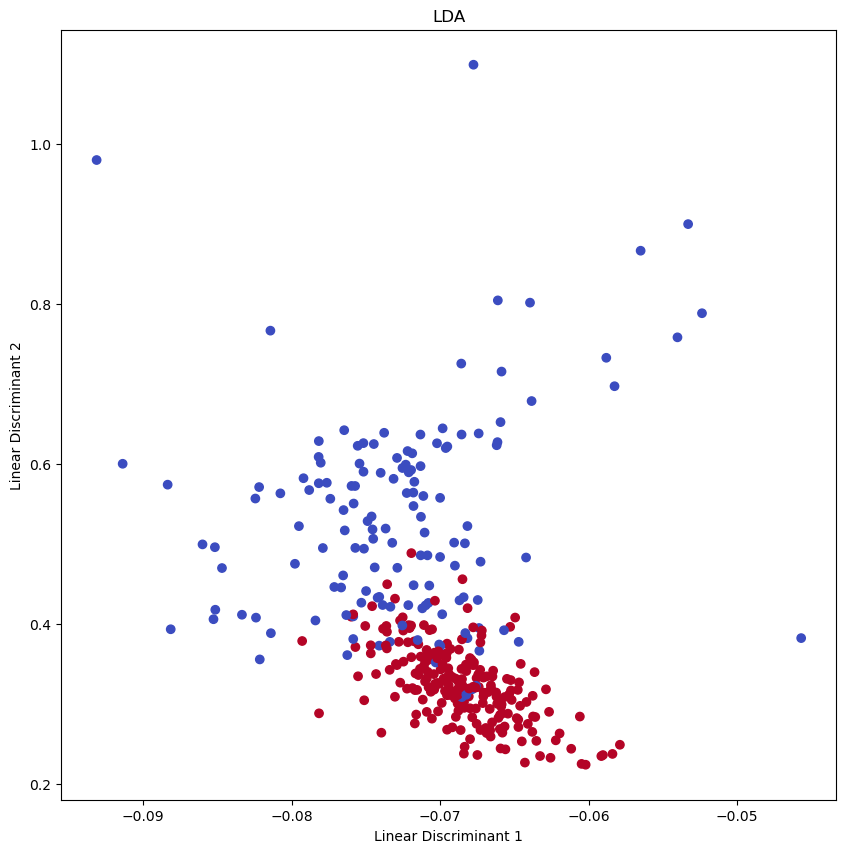

In [5]:
plt.figure(figsize=(10, 10))
# blue and red colors
plt.scatter(x0_train, x1_train, c=y_train, cmap='coolwarm')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.title('LDA')
plt.show()

### KNN

In [37]:
knn_model = KNN(k=3)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
knn_confusion_matrix = confusion_matrix(y_test, y_pred_knn)
knn_accuracy = accuracy(y_test, y_pred_knn)
knn_precision = precision(y_test, y_pred_knn)
knn_recall = recall(y_test, y_pred_knn)
knn_f1 = f1(y_test, y_pred_knn)

print("KNN confusion matrix: \n", knn_confusion_matrix)
print("KNN accuracy: ", knn_accuracy)
print("KNN precision: ", knn_precision)
print("KNN recall: ", knn_recall)
print("KNN f1: ", knn_f1)

KNN confusion matrix: 
 (52, 29, 2, 3)
KNN accuracy:  0.9418604651162791
KNN precision:  0.9629629629629629
KNN recall:  0.9454545454545454
KNN f1:  0.9541284403669724


tpr:  0.9454545454545454
fpr:  0.06451612903225806


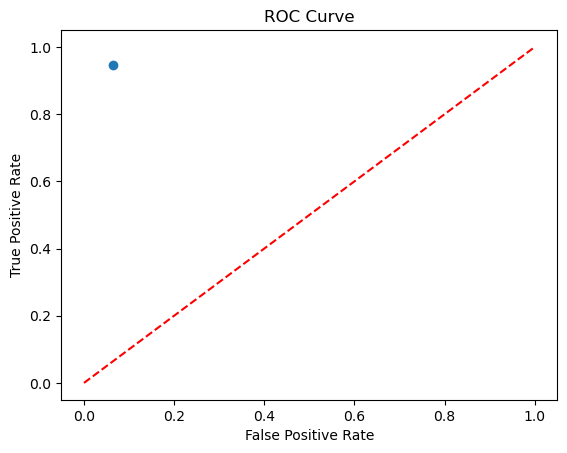

In [38]:
# roc curve
tpr, fpr = roc(y_test, y_pred_knn)
print("tpr: ", tpr)
print("fpr: ", fpr)

plt.scatter(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

TPR:  [0.9636363636363636, 0.9636363636363636, 0.9454545454545454, 0.9454545454545454, 0.9454545454545454, 0.9636363636363636, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
FPR:  [0.06451612903225806, 0.06451612903225806, 0.06451612903225806, 0.06451612903225806, 0.03225806451612903, 0.03225806451612903, 0.03225806451612903, 0.03225806451612903, 0.06451612903225806, 0.06451612903225806, 0.06451612903225806, 0.0967741935483871, 0.12903225806451613, 0.0967741935483871, 0.12903225806451613, 0.12903225806451613, 0.12903225806451613, 0.12903225806451613, 0.12903225806451613, 0.0967741935483871, 0.0967741935483871, 0.0967741935483871, 0.0967741935483871, 0.0967741935483871, 0.12903225806451613, 0.12903225806451613, 0.12903225806451613, 0.0967741935483871, 0.12903225806451613, 0.12903225806451613, 0.12903225806451613, 0.129032

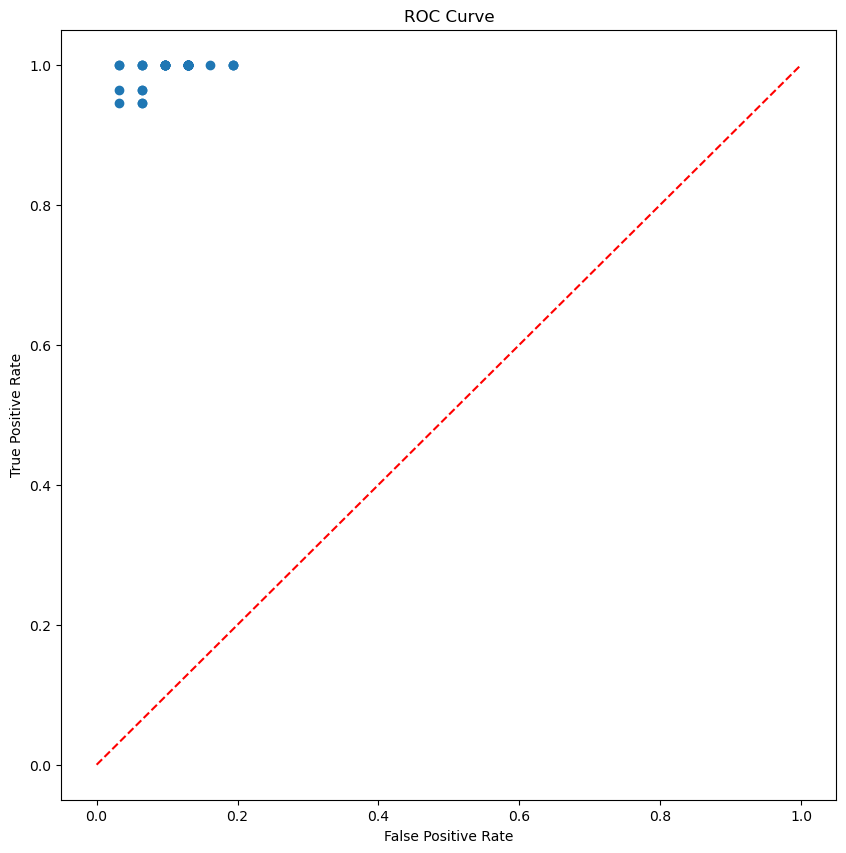

Best k:  7


In [40]:
TPR = []
FPR = []

for i in range(1, 50):
    knn_model = KNN(k=i)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    
    roc_values = roc(y_test, y_pred_knn)
    TPR.append(roc_values[0])
    FPR.append(roc_values[1])

print("TPR: ", TPR)
print("FPR: ", FPR)

# plot ROC curve
plt.figure(figsize=(10, 10))
plt.scatter(FPR, TPR)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Find the best k
best_k = np.argmax([TPR[i]-FPR[i] for i in range(len(TPR))]) + 1
print("Best k: ", best_k)

Best k:  7
KNN confusion matrix: 
 (55, 30, 1, 0)
KNN accuracy:  0.9883720930232558
KNN precision:  0.9821428571428571
KNN recall:  1.0
KNN f1:  0.9909909909909909
tpr:  1.0
fpr:  0.03225806451612903


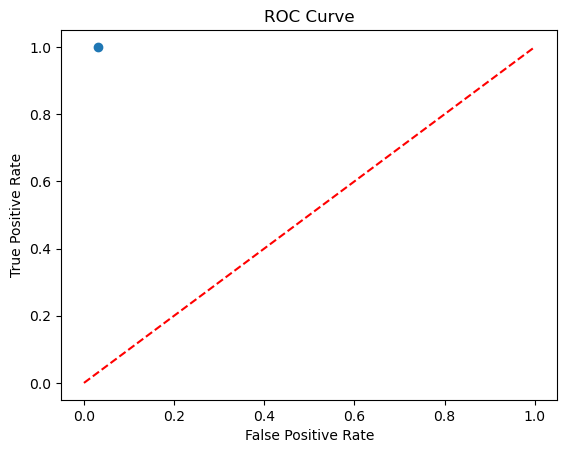

In [36]:
# Train the model with the best k

knn_model = KNN(k=best_k)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
knn_confusion_matrix = confusion_matrix(y_test, y_pred_knn)
knn_accuracy = accuracy(y_test, y_pred_knn)
knn_precision = precision(y_test, y_pred_knn)
knn_recall = recall(y_test, y_pred_knn)
knn_f1 = f1(y_test, y_pred_knn)

print("KNN confusion matrix: \n", knn_confusion_matrix)
print("KNN accuracy: ", knn_accuracy)
print("KNN precision: ", knn_precision)
print("KNN recall: ", knn_recall)
print("KNN f1: ", knn_f1)

# roc curve
tpr, fpr = roc(y_test, y_pred_knn)
print("tpr: ", tpr)
print("fpr: ", fpr)

plt.scatter(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## (c)
Una vez que haya desarrollado todos los modelos y este satisfecho con la performance de cada uno, evalúe las métricas de performance antes mencionadas para cada uno de los clasificadores desarrollados, mediante validación cruzada con 5 folds (en este caso, se deben juntar los conjuntos de entrenamiento y validación, y hacer validación cruzada sobre estos) y mediante evaluación sobre el test set.
Comparar los resultados con las métricas reportadas en el inciso anterior, y analizar cualquier diferencia que se observe. En el caso de las métricas escalares, arme una tabla que muestre las métricas evaluadas de las tres maneras distintas (validación, test y validación cruzada). En el caso de las curvas AUC-ROC, hacer un gráfico mostrando las distintas curvas.